# Descriptive Statistics.

Working with dataset: 
- https://archive.ics.uci.edu/ml/datasets/Vertebral+Column

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Vamos a ver aquí algunas medidas iniciales para el análisis de datos. El análisis inicial de los datos es muy importante para hacer estimaciones y sacar conclusiones.

In [2]:
names=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","class"]
data=pd.read_csv("../Datas/VertebralColumn/column_2C.dat",delimiter="\s+",names=names)

In [3]:
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


Podemos hacer primero una visión general de nuestros datos para entender cual es el compotamiento de las variables que tenemos en el estudio. Esto podemos hacerlo muy fácilmente con Python usando una librería de pandas y usando algunos de los algoritmos y funciones predefinidas.

In [4]:
print("El número de variables es N_var =",len(data.columns))
print("El número de casos o instancias (o individuos estudiados) es N =",len(data))

El número de variables es N_var = 7
El número de casos o instancias (o individuos estudiados) es N = 310


Algunos estdísticos comunes y usuales. Por ejemplo podemos calcular la media, mediana y moda, así como también las desviaciones estándar y varianzas para cada una de las 7 variables.

- Media (Promedio): 
\begin{equation}
\bar x=\frac{1}{N}\sum_{i=0}^{N-1}x_i
\end{equation}
- Mediana (Cuartil 50): Con datos ordenados en orden ascendente:
\begin{equation}
median=\left\{\begin{matrix}
x\left[\frac{N}{2}\right] &  \mbox{si $N$ es par}\\
\frac{1}{2}\left(x\left[\frac{N-1}{2}\right]+x\left[\frac{N+1}{2}\right]\right) &  \mbox{si $N$ es impar}\\
\end{matrix}\right.
\end{equation}
- Moda (dato con mayor frecuencia)
- varianza:
\begin{equation}
s^2(x)=\mbox{Var}(x)=\frac{1}{N}\sum_{i=0}^{N-1}(x_i-\bar x)^2
\end{equation}
- Desviación estándar:
\begin{equation}
\sigma_x=s(x)=\sqrt{\mbox{Var}(x)}=\sqrt{\frac{1}{N}\sum_{i=0}^{N-1}(x_i-\bar x)^2}
\end{equation}


In [5]:
def average(var):
    return np.sum(var)/len(var)
def median(var):
    var_ord=np.sort(var)
    N=len(var_ord)
    if N%2==0:
        median=var_ord[N//2]
    if N%2!=0:
        median=(var_ord[(N-1)//2]+var_ord[(N+1)//2])/2
    return median
def mode(var):
    dat,frec=np.unique(var,return_counts=True)
    if len(dat[frec==frec.max()])>1:
        print("Existen varias modas (la variable es multimodal)")
    if len(dat[frec==frec.max()])==1:
        print("Existe una moda (la variable es unimodal)")
    return dat[frec==frec.max()]

In [6]:
def variance(var):
    return np.sum((var-average(var))**2)/len(var)
def std(var):
    return np.sqrt(variance(var))

In [7]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"el promedio (la media) es <{}> =".format(str(i)),average(data[i]))

Para la variable pelvic_incidence el promedio (la media) es <pelvic_incidence> = 60.49648387096773
Para la variable pelvic_tilt el promedio (la media) es <pelvic_tilt> = 17.542903225806448
Para la variable lumbar_lordosis_angle el promedio (la media) es <lumbar_lordosis_angle> = 51.93070967741936
Para la variable sacral_slope el promedio (la media) es <sacral_slope> = 42.953870967741935
Para la variable pelvic_radius el promedio (la media) es <pelvic_radius> = 117.92054838709676
Para la variable degree_spondylolisthesis el promedio (la media) es <degree_spondylolisthesis> = 26.296741935483873


In [8]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"la mediana es med({}) =".format(str(i)),median(data[i]))

Para la variable pelvic_incidence la mediana es med(pelvic_incidence) = 58.78
Para la variable pelvic_tilt la mediana es med(pelvic_tilt) = 16.42
Para la variable lumbar_lordosis_angle la mediana es med(lumbar_lordosis_angle) = 49.78
Para la variable sacral_slope la mediana es med(sacral_slope) = 42.44
Para la variable pelvic_radius la mediana es med(pelvic_radius) = 118.34
Para la variable degree_spondylolisthesis la mediana es med(degree_spondylolisthesis) = 12.07


In [9]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"la moda es moda({}) =".format(str(i)),mode(data[i]))

Existen varias modas (la variable es multimodal)
Para la variable pelvic_incidence la moda es moda(pelvic_incidence) = [42.52 49.71 50.91 53.94 54.92 63.03 65.01 65.76 74.72]
Existen varias modas (la variable es multimodal)
Para la variable pelvic_tilt la moda es moda(pelvic_tilt) = [ 5.27  8.4  10.06 10.22 10.76 13.11 13.28 13.92 14.38 15.4  16.42 16.74
 17.44 19.44 21.12 23.08 26.33 33.28 37.52]
Existen varias modas (la variable es multimodal)
Para la variable lumbar_lordosis_angle la moda es moda(lumbar_lordosis_angle) = [35. 42. 47. 52. 58.]
Existe una moda (la variable es unimodal)
Para la variable sacral_slope la moda es moda(sacral_slope) = [56.31]
Existen varias modas (la variable es multimodal)
Para la variable pelvic_radius la moda es moda(pelvic_radius) = [110.71 116.56 116.59 116.8  117.98 119.32 129.39]
Existen varias modas (la variable es multimodal)
Para la variable degree_spondylolisthesis la moda es moda(degree_spondylolisthesis) = [-4.08 -2.01  1.01  3.09  4.96]


In [10]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"la varianza es Var({}) =".format(str(i)),variance(data[i]))

Para la variable pelvic_incidence la varianza es Var(pelvic_incidence) = 296.12512021748176
Para la variable pelvic_tilt la varianza es Var(pelvic_tilt) = 99.83976124869929
Para la variable lumbar_lordosis_angle la varianza es Var(lumbar_lordosis_angle) = 343.13176723829343
Para la variable sacral_slope la varianza es Var(sacral_slope) = 179.5889740478668
Para la variable pelvic_radius la varianza es Var(pelvic_radius) = 176.7871277637877
Para la variable degree_spondylolisthesis la varianza es Var(degree_spondylolisthesis) = 1406.119148417274


In [11]:
for i in data.columns[:-1]:
    print("Para la variable "+str(i),"la desviación estándar es STD({}) =".format(str(i)),std(data[i]))

Para la variable pelvic_incidence la desviación estándar es STD(pelvic_incidence) = 17.208286382364797
Para la variable pelvic_tilt la desviación estándar es STD(pelvic_tilt) = 9.991984850303732
Para la variable lumbar_lordosis_angle la desviación estándar es STD(lumbar_lordosis_angle) = 18.523816216921755
Para la variable sacral_slope la desviación estándar es STD(sacral_slope) = 13.401081077579779
Para la variable pelvic_radius la desviación estándar es STD(pelvic_radius) = 13.296132060256761
Para la variable degree_spondylolisthesis la desviación estándar es STD(degree_spondylolisthesis) = 37.49825527164263


También podemos usar una función de Pandas que reune algunos estadísticos básicos:

In [12]:
vertebral_stats=data.describe().T

In [13]:
vertebral_stats

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496484,17.236109,26.15,46.4325,58.690,72.8800,129.83
pelvic_tilt,310.0,17.542903,10.008140,-6.55,10.6675,16.360,22.1200,49.43
lumbar_lordosis_angle,310.0,51.930710,18.553766,14.00,37.0000,49.565,63.0000,125.74
sacral_slope,310.0,42.953871,13.422748,13.37,33.3475,42.405,52.6925,121.43
pelvic_radius,310.0,117.920548,13.317629,70.08,110.7100,118.265,125.4675,163.07
degree_spondylolisthesis,310.0,26.296742,37.558883,-11.06,1.6000,11.765,41.2850,418.54


también podemos usar las funciones que están predefinidas en Python para estas tareas:

In [14]:
import scipy.stats as st
# La mediana puede ser también calculada, así como el coeficiente de asimetría y curtosis respectivamente
print(data.columns)
print("media =",np.mean(data.loc[:, data.columns != 'class'],axis=0))
print("median =",np.median(data.loc[:, data.columns != 'class'],axis=0))
print("varianza =",np.var(data.loc[:, data.columns != 'class'],axis=0))
print("desviación estándar =",np.std(data.loc[:, data.columns != 'class'],axis=0))
print("skewness =",st.skew(data.loc[:, data.columns != 'class'],axis=0))
print("kurtosis =",st.kurtosis(data.loc[:, data.columns != 'class'],axis=0))

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')
media = pelvic_incidence             60.496484
pelvic_tilt                  17.542903
lumbar_lordosis_angle        51.930710
sacral_slope                 42.953871
pelvic_radius               117.920548
degree_spondylolisthesis     26.296742
dtype: float64
median = [ 58.69   16.36   49.565  42.405 118.265  11.765]
varianza = pelvic_incidence             296.125120
pelvic_tilt                   99.839761
lumbar_lordosis_angle        343.131767
sacral_slope                 179.588974
pelvic_radius                176.787128
degree_spondylolisthesis    1406.119148
dtype: float64
desviación estándar = pelvic_incidence            17.208286
pelvic_tilt                  9.991985
lumbar_lordosis_angle       18.523816
sacral_slope                13.401081
pelvic_radius               13.296132
degree_spondylolisthesis    37.498255
d

In [15]:
vertebral_stats["median"]=np.median(data.loc[:, data.columns != 'class'],axis=0)
vertebral_stats["skewness"]=st.skew(data.loc[:, data.columns != 'class'],axis=0)
vertebral_stats["kurtosis"]=st.kurtosis(data.loc[:, data.columns != 'class'],axis=0)

In [16]:
vertebral_stats

,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis
pelvic_incidence,310.0,60.496484,17.236109,26.15,46.4325,58.690,72.8800,129.83,58.690,0.517864,0.200656
pelvic_tilt,310.0,17.542903,10.008140,-6.55,10.6675,16.360,22.1200,49.43,16.360,0.673299,0.645970
lumbar_lordosis_angle,310.0,51.930710,18.553766,14.00,37.0000,49.565,63.0000,125.74,49.565,0.596469,0.139779
sacral_slope,310.0,42.953871,13.422748,13.37,33.3475,42.405,52.6925,121.43,42.405,0.788837,2.940509
pelvic_radius,310.0,117.920548,13.317629,70.08,110.7100,118.265,125.4675,163.07,118.265,-0.176074,0.900357
degree_spondylolisthesis,310.0,26.296742,37.558883,-11.06,1.6000,11.765,41.2850,418.54,11.765,4.296966,37.437457


In [17]:
vertebral_stats["LII"]=vertebral_stats["25%"]-((vertebral_stats["75%"]-vertebral_stats["25%"])*1.5)
vertebral_stats["LIS"]=vertebral_stats["75%"]+((vertebral_stats["75%"]-vertebral_stats["25%"])*1.5)
vertebral_stats["LEI"]=vertebral_stats["25%"]-((vertebral_stats["75%"]-vertebral_stats["25%"])*3.0)
vertebral_stats["LES"]=vertebral_stats["75%"]+((vertebral_stats["75%"]-vertebral_stats["25%"])*3.0)

In [18]:
vertebral_stats

,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis,LII,LIS,LEI,LES
pelvic_incidence,310.0,60.496484,17.236109,26.15,46.4325,58.690,72.8800,129.83,58.690,0.517864,0.200656,6.76125,112.55125,-32.9100,152.2225
pelvic_tilt,310.0,17.542903,10.008140,-6.55,10.6675,16.360,22.1200,49.43,16.360,0.673299,0.645970,-6.51125,39.29875,-23.6900,56.4775
lumbar_lordosis_angle,310.0,51.930710,18.553766,14.00,37.0000,49.565,63.0000,125.74,49.565,0.596469,0.139779,-2.00000,102.00000,-41.0000,141.0000
sacral_slope,310.0,42.953871,13.422748,13.37,33.3475,42.405,52.6925,121.43,42.405,0.788837,2.940509,4.33000,81.71000,-24.6875,110.7275
pelvic_radius,310.0,117.920548,13.317629,70.08,110.7100,118.265,125.4675,163.07,118.265,-0.176074,0.900357,88.57375,147.60375,66.4375,169.7400
degree_spondylolisthesis,310.0,26.296742,37.558883,-11.06,1.6000,11.765,41.2850,418.54,11.765,4.296966,37.437457,-57.92750,100.81250,-117.4550,160.3400


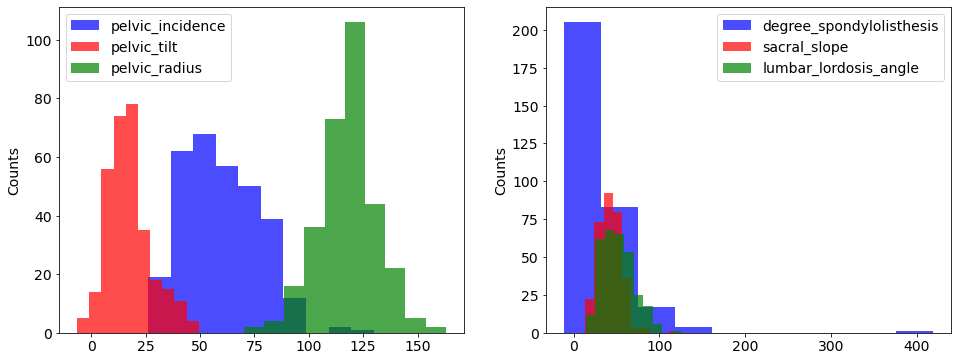

In [19]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist(data["pelvic_incidence"],label="pelvic_incidence",alpha=0.7,color='b')
plt.hist(data["pelvic_tilt"],label="pelvic_tilt",alpha=0.7,color='r')
plt.hist(data["pelvic_radius"],label="pelvic_radius",alpha=0.7,color='g')
plt.legend(fontsize=14)
plt.ylabel("Counts",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(122)
plt.hist(data["degree_spondylolisthesis"],label="degree_spondylolisthesis",alpha=0.7,color='b')
plt.hist(data["sacral_slope"],label="sacral_slope",alpha=0.7,color='r')
plt.hist(data["lumbar_lordosis_angle"],label="lumbar_lordosis_angle",alpha=0.7,color='g')
plt.legend(fontsize=14)
plt.ylabel("Counts",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../figures/vertebral_hist1.png",bbox_inches ="tight")
plt.show()

No handles with labels found to put in legend.


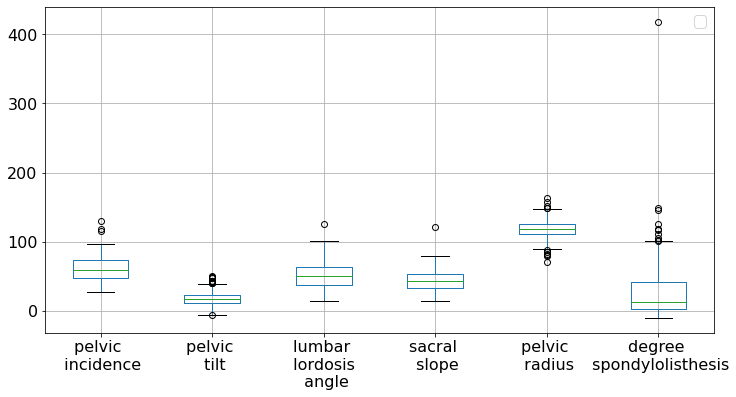

In [20]:
plt.figure(figsize=(12,6))
data.boxplot(grid=True,fontsize=15)
plt.legend(fontsize=16)
plt.xticks(range(1,7),np.array(["pelvic \n incidence","pelvic \n tilt","lumbar \n lordosis \n angle","sacral \n slope","pelvic \n radius","degree \n spondylolisthesis"]),fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("../../figures/vertebral_boxplot1.png",bbox_inches ="tight")
plt.show()

Contabilizando los valores atípicos y extremos.

In [12]:
vertebral_stats2=pd.DataFrame()
vertebral_stats2.index=vertebral_stats.index
atipicos,extremos=[],[]
for i in vertebral_stats2.index:
    LII=vertebral_stats[vertebral_stats.index==i]["LII"][0]
    LIS=vertebral_stats[vertebral_stats.index==i]["LIS"][0]
    LEI=vertebral_stats[vertebral_stats.index==i]["LEI"][0]
    LES=vertebral_stats[vertebral_stats.index==i]["LES"][0]
    atipicos.append(len(data[((data[i]<=LII)&(data[i]>=LIS))|((data[i]>=LIS)&(data[i]<=LES))]))
    extremos.append(len(data[((data[i]<=LEI)|(data[i]>=LES))]))
vertebral_stats2["Valores atipicos"]=atipicos
vertebral_stats2["Valores extremos"]=extremos
vertebral_stats2["Valores atipicos (%)"]=np.round(vertebral_stats2["Valores atipicos"]/len(data)*100,2)
vertebral_stats2["Valores extremos (%)"]=np.round(vertebral_stats2["Valores extremos"]/len(data)*100,2)
vertebral_stats2.loc['Total'] = vertebral_stats2.sum(axis=0)

In [13]:
vertebral_stats2

,Valores atipicos,Valores extremos,Valores atipicos (%),Valores extremos (%)
pelvic_incidence,3.0,0.0,0.97,0.00
pelvic_tilt,12.0,0.0,3.87,0.00
lumbar_lordosis_angle,1.0,0.0,0.32,0.00
sacral_slope,0.0,1.0,0.00,0.32
pelvic_radius,5.0,0.0,1.61,0.00
degree_spondylolisthesis,9.0,1.0,2.90,0.32
Total,30.0,2.0,9.67,0.64


Supongamos que emiminamos los valores atípicos de los datos, ¿cómo luciría la distribución de frecuencias de los datos?

In [14]:
def filter_outlier(col):
    LII=vertebral_stats[vertebral_stats.index==col]["LII"][0]
    LIS=vertebral_stats[vertebral_stats.index==col]["LIS"][0]
    LEI=vertebral_stats[vertebral_stats.index==col]["LEI"][0]
    LES=vertebral_stats[vertebral_stats.index==col]["LES"][0]
    return data[~(((data[col]<=LII)&(data[col]>=LIS))|((data[col]>=LIS)&(data[col]<=LES)))][col]

In [15]:
filter_outlier("degree_spondylolisthesis")

0      -0.25
1       4.56
2      -3.53
3      11.21
4       7.92
       ...  
305    -4.25
306    -0.42
307    -2.71
308     0.21
309    -0.20
Name: degree_spondylolisthesis, Length: 301, dtype: float64

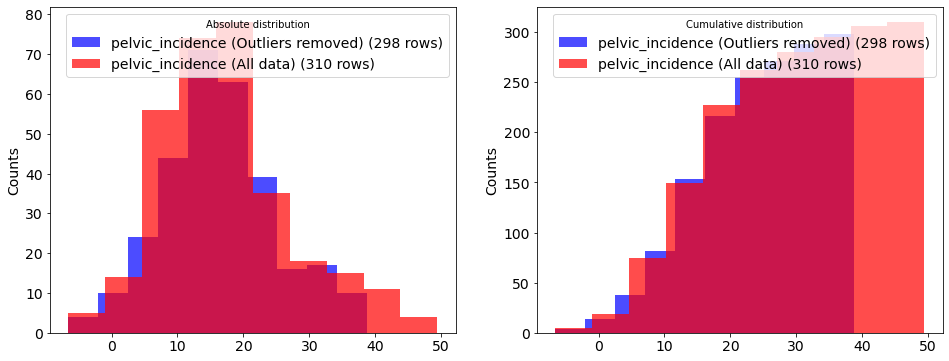

In [16]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist(filter_outlier("pelvic_tilt"),label="pelvic_incidence (Outliers removed) ({} rows)".format(len(filter_outlier("pelvic_tilt"))),alpha=0.7,color='b')
plt.hist(data["pelvic_tilt"],label="pelvic_incidence (All data) ({} rows)".format(len(data)),alpha=0.7,color='r')
plt.legend(title="Absolute distribution",fontsize=14)
plt.ylabel("Counts",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(122)
plt.hist(filter_outlier("pelvic_tilt"),label="pelvic_incidence (Outliers removed) ({} rows)".format(len(filter_outlier("pelvic_tilt"))),alpha=0.7,cumulative=True,color='b')
plt.hist(data["pelvic_tilt"],label="pelvic_incidence (All data) ({} rows)".format(len(data)),alpha=0.7,cumulative=True,color='r')
plt.legend(title="Cumulative distribution",fontsize=14)
plt.ylabel("Counts",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../figures/vertebral_hist2.png",bbox_inches ="tight")
plt.show()

## Criterio de Chauvenet
Una manera de identificar datos extremos y con la idea de eliminarlos, es usar el criterio de Chauvenet, el cual se basa en la idea de encontrar una banda de probabilidad, centrada en la media de una distribución normal, que debería contener razonablemente todas las $n$ muestras de un conjunto de datos. De este modo, los puntos de datos de las $n$ muestras que se encuentran fuera de esta banda de probabilidad pueden considerarse valores atípicos, eliminarse del conjunto de datos y calcularse una nueva media y desviación típica basadas en los valores restantes y el nuevo tamaño de la muestra. Esta identificación de los valores atípicos se logra encontrando el número de desviaciones estándar que corresponden a los límites de la banda de probabilidad alrededor de la media ($D_{max}$) y comparando ese valor con el valor absoluto de la diferencia entre los presuntos valores atípicos y la media dividido por la desviación estándar
\begin{equation}
D_{max} \leq \frac{|x-\bar x|}{s_x},
\label{chauvenet1}
\end{equation}
donde $D_{max}$ es la desviación máxima permitida, $|\cdot |$ es el valor absoluto, $x$ es el valor del presunto valor atípico, $\bar x$ es la media de la muestra, y $s_x$ es la desviación estándar de la muestra.

Para que se considere que se incluyen todas las $n$ observaciones de la muestra, la banda de probabilidad (centrada en la media) sólo debe tener en cuenta $n-1/2$ muestras (si $n=3$ entonces sólo 2.5 de las muestras deben tenerse en cuenta en la banda de probabilidad). En resumen, estamos buscando la probabilidad, $P$, que es igual a $n-1/2$ de $n$ muestras
\begin{equation}
P=\frac{n-1/2}{n}=1-\frac{1}{2n},
\end{equation}
donde, $P$ es la banda de probabilidad centrada en la media de la muestra y $n$ es el tamaño de la muestra.

La cantidad $1/(2n)$ corresponde a la probabilidad combinada representada por las dos colas de la distribución normal que caen fuera de la banda de probabilidad $P$. Para encontrar el nivel de desviación estándar asociado a $P$, sólo es necesario analizar la probabilidad de una de las colas de la distribución normal debido a su simetría $P_z=1(4n)$, donde $P_z$ es la probabilidad representada por una cola de la distribución normal y $n$ es el tamaño de la muestra.

La ecuación \ref{chauvenet1} es análoga a la ecuación de puntuación $Z$ para una distribución normal
\begin{equation}
Z=\frac{x-\mu}{\sigma},
\label{normal1}
\end{equation}
donde, $Z$ es el valor $Z$ de la distribución normal, $x$ es el valor de la muestra, $\mu$ es la media de la distribución normal estándar, y $\sigma=1$ es la desviación estándar de la distribución normal estándar.

Basado en la Ecuación \ref{normal1}, para encontrar el $D_{max}$ debemos encontrar la puntuación $Z$ correspondiente a $P_z$ en una tabla de puntuación de una distribución normal. $D_{max}$ es igual a la puntuación de $P_z$. Usando este método $D_{max}$ puede determinarse para cualquier tamaño de muestra. 

Para aplicar el criterio de Chauvenet, primero hay que calcular la media y la desviación estándar de los datos observados. En función de la diferencia entre el dato sospechoso y la media, utilice la función de distribución normal (o una tabla de la misma) para determinar la probabilidad de que un punto de datos dado se encuentre en el valor del punto de datos sospechoso. Multiplique esta probabilidad por el número de puntos de datos tomados. Si el resultado es inferior a 0.5, el punto de datos sospechoso puede ser descartado, es decir, una lectura puede ser rechazada si la probabilidad de obtener la desviación particular de la media es inferior a $\frac{1}{2n}$.

Veamos esto de manera sencilla para el conjunto de datos 'Vertebral Column' y además sólo para la variable 'pelvic_tilt' en la que recordemos habíamos conseguido 12 valores atípicos.

In [17]:
print("La media es =",data["pelvic_tilt"].mean())
print("La desviación estándar es =",data["pelvic_tilt"].std())
# El z-score para todos los datos es:
Z=abs(data["pelvic_tilt"]-data["pelvic_tilt"].mean())/data["pelvic_tilt"].std()

La media es = 17.542903225806448
La desviación estándar es = 10.008140050586714


In [18]:
Z

0      0.500302
1      0.747682
2      0.467329
3      0.710132
4      0.788648
         ...   
305    0.391971
306    0.317451
307    0.514291
308    0.884570
309    1.246276
Name: pelvic_tilt, Length: 310, dtype: float64

In [19]:
import scipy.stats as st
n=len(data["pelvic_tilt"])
PZ=1-(1/(4*n))
Z_score=st.norm.ppf(PZ)
print("Z_score es = {} para n={} observaciones con una probabilidad de P_Z=1-(1((4*n))) = {}".format(Z_score,len(data["pelvic_tilt"]),PZ))

Z_score es = 3.1535631591215094 para n=310 observaciones con una probabilidad de P_Z=1-(1((4*n))) = 0.9991935483870967


Luego veamos cuales Z están por encima del valor Z-score de la distribución normal.

In [20]:
Z[Z>=Z_score]

179    3.186116
Name: pelvic_tilt, dtype: float64

In [21]:
1-(1/(4*30))

0.9916666666666667

No handles with labels found to put in legend.


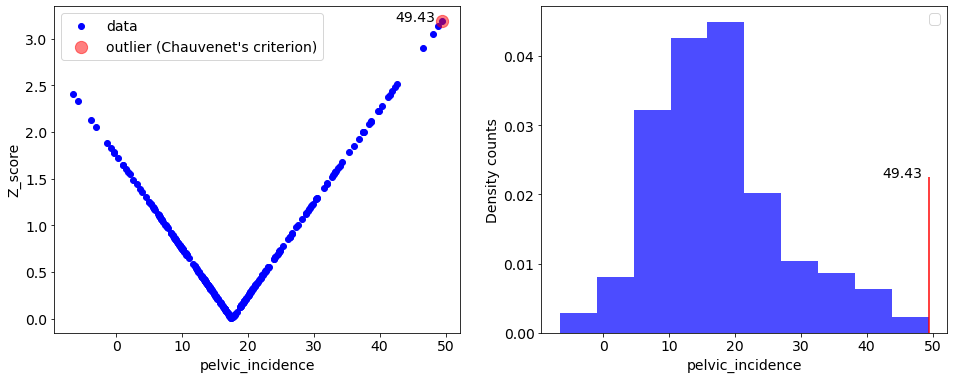

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(121)
#plt.hist(filter_outlier("pelvic_tilt"),label="pelvic_incidence (Outliers removed) ({} rows)".format(len(filter_outlier("pelvic_tilt"))),alpha=0.7,color='b')
plt.scatter(data["pelvic_tilt"],Z,label="data",alpha=0.99,color='b')
plt.scatter(data["pelvic_tilt"].iloc[179],Z.iloc[179],label="outlier (Chauvenet's criterion)",alpha=0.5,color='r',s=150,edgecolors='face',facecolor=None)
plt.text(data["pelvic_tilt"].iloc[179]-7,Z.iloc[179],str(data["pelvic_tilt"].iloc[179]),fontsize=14)
plt.legend(fontsize=14)
plt.xlabel("pelvic_incidence",fontsize=14)
plt.ylabel("Z_score",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(122)
hist=plt.hist(data["pelvic_tilt"],alpha=0.7,color='b',density=True)
plt.vlines(data["pelvic_tilt"].iloc[179],0,hist[0].max()/2,alpha=0.99,color='r')
plt.text(data["pelvic_tilt"].iloc[179]-7,hist[0].max()/2,str(data["pelvic_tilt"].iloc[179]),fontsize=14)
#plt.scatter(data["pelvic_tilt"].iloc[179],Z.iloc[179],label="outlier (Chauvenet's criterion)",alpha=0.5,color='r',s=150,edgecolors='face',facecolor=None)
#plt.text(data["pelvic_tilt"].iloc[179]-7,Z.iloc[179],str(data["pelvic_tilt"].iloc[179]),fontsize=14)
plt.legend(fontsize=14)
plt.xlabel("pelvic_incidence",fontsize=14)
plt.ylabel("Density counts",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("../../figures/vertebral_hist3.png",bbox_inches ="tight")
plt.show()

## Prueba de Grubbs

El test de Grubbs (llamado así por Frank E. Grubbs, que publicó el test en 1950), también conocido como test del residuo máximo normalizado o test de la desviación estudiantil extrema, es un test utilizado para detectar valores atípicos en un conjunto de datos univariantes que se supone que provienen de una población normalmente distribuida.

La prueba de Grubbs se basa en el supuesto de normalidad. Es decir, antes de aplicar la prueba de Grubbs se debe verificar que los datos pueden ser razonablemente aproximados por una distribución normal.

La prueba de Grubbs detecta un valor atípico cada vez. Este valor atípico se elimina del conjunto de datos y la prueba se repite hasta que no se detectan valores atípicos. Sin embargo, las iteraciones múltiples cambian las probabilidades de detección, y la prueba no debería utilizarse para tamaños de muestra de seis o menos, ya que suele marcar la mayoría de los puntos como valores atípicos.

La prueba es muy parecida a la de Chauvenet como en la sección anterior pero usa una nueva distribución y además un ligero cambio en el estadístico de prueba. El estadístico de la prueba de Grubbs se define como: 
\begin{equation}
G_{max}=\frac{\mbox{max}_{i=1}^N|x-\bar x|}{s_x},
\end{equation}
donde $G_{max}$ es la desviación máxima permitida, $|\cdot |$ es el valor absoluto, $x$ es el valor del presunto valor atípico, $\bar x$ es la media de la muestra, y $s_x$ es la desviación estándar de la muestra.

Entonces se propone una prueba estadística de hipótesis de dos caras, para la que se rechaza la hipótesis de ausencia de valores atípicos al nivel de significación $\alpha$ si 
\begin{equation}
G_{max}>\frac{N-1}{N}\sqrt{\frac{t^2_{\alpha/(2N),N-2}}{N-2+t^2_{\alpha/(2N),N-2}}},
\end{equation}
con $t^2_{\alpha/(2N),N-2}$ denotando el valor crítico superior de la distribución $t$ con $N-2$ grados de libertad y un nivel de significación de $\alpha/(2N)$. 

Veamos esto de manera sencilla para el conjunto de datos ``Vertebral Column'' y además sólo para la variable ``pelvic\_tilt'' en la que recordemos habíamos conseguido 12 valores atípicos. En este caso, el promedio y la desviación estándar son 17.5429 y 10.0081, respectivamente, por tanto podemos calcular el valor $G_{max}$ para cada uno de los 310 datos de la muestra. Además podemos calcular el valor t de la distribución t-Student para una significancia de $\alpha=0.05$ y 310-2=308 grados de libertad. 


In [23]:
alpha = 0.05
cv = st.t.ppf(1-alpha/2, 6)
print("t_test es = {} para n={} observaciones con una significancia de {}".format(cv,len(data["pelvic_tilt"]),alpha))

t_test es = 2.4469118487916806 para n=310 observaciones con una significancia de 0.05


In [24]:
print("La media es =",data["pelvic_tilt"].mean())
print("La desviación estándar es =",data["pelvic_tilt"].std())
# El z-score para todos los datos es:
G=np.max(abs(data["pelvic_tilt"]-data["pelvic_tilt"].mean())/data["pelvic_tilt"].std())

La media es = 17.542903225806448
La desviación estándar es = 10.008140050586714


In [25]:
Gi=abs(data["pelvic_tilt"]-data["pelvic_tilt"].mean())/data["pelvic_tilt"].std()
Gi[Gi==Gi.max()]

179    3.186116
Name: pelvic_tilt, dtype: float64

In [26]:
print("El estadístico de prueba es",Gi.max(), "o sea el dato de la fila", Gi[Gi==Gi.max()])

El estadístico de prueba es 3.186116162745366 o sea el dato de la fila 179    3.186116
Name: pelvic_tilt, dtype: float64


In [27]:
if G>cv:
    print("El valor es un extremo")
if G<=cv:
    print("El valor NO es un extremo")

El valor es un extremo
